## Observations and Insights

The first observation I noticed is that the drug Capomulin has a more positive effect on tumor volume than any of the other drugs, besides Ramicane; and those 2 drugs have very similar effects.  Both of these drugs had the lowest average tumor volume observed, as well as the lowest variation in tumor volume.  These 2 drugs were also tested out on the most subjects, which would show that the positive outcomes are actually quite consistent. If Ramicane would be considered the most effective drug on the market to reduce tumor volume, then it is possible to say that Capomulin has performed right on par.

The distribution of female versus male mice is nearly identical across the entirety the study.  It may be more beneficial to look at the distribution of female versus male mice across each regimen to determine if there is any difference in outcome based on sex.  On a broad scale they are distributed equally through the whole study so there is no determination if the effects are different between the sexes.

Over the four drugs that were analyzed, there were almost no outliers in the tumor sizes of the mice.  Only one drug had any outliers, Infubinol, and it only had one single outlier data point.  Almost all data points cluster within the lower and upper bounds of the quartile ranges.  This shows that it is very rare that you would get a tumor that drastically grows or shrinks.  Since it is so rare to see within the study, the single outlier point within the Infubinol regimen could likely be considered to be caused by some outide circumstance.

There is a strong positive correlation between mouse weight and average tumor volume in the Capomulin subjects.  The pearson r-value is 0.9, which is an almost perfect positive correlation.  As weight increases so does tumor volume, and vice versa.  Conversely if you can drop weight, you can also lower the tumor volume. These two attributes seem to be directly correlated.

The final observation I made is that when looking at mouse l509 that was given Capomulin, the tumor volume did decrease over an observed length of time.  This mouse was observed over a period of 45 days.  For the first 20 days of the study, the tumor size of this mouse steadily increased by about a cubic millimeter every five days. Over the next five days the size of the tumor dropped drastically by four cubic millimeters, to a point lower than what was observed at the start of the study.  During the next 10 days the size slightly increased right before radically dropping another 4 cubic millimeters.  The study concludes over the next 10 days by growing slightly below 2 cubic millimeters.   Based on the observed trend, if the drug were to be continually administered, you would expect to see another significant drop off in the near future.  Overall during the study the tumor size dropped by 4 cubic millimeters from the start until the finish, or almost 10%.

On the whole, there is favorable evidence to suggest that the new drug Capomulin does help in decreasing overall tumor volume.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = merged_df.groupby("Drug Regimen")

tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_med = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_sd = regimen_df["Tumor Volume (mm3)"].std()
tumor_sem = regimen_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_med, "Tumor Volume Variance": tumor_var,
                          "Tumor Volume Std Dev": tumor_sd, "Tumor Volume SEM": tumor_sem})

summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

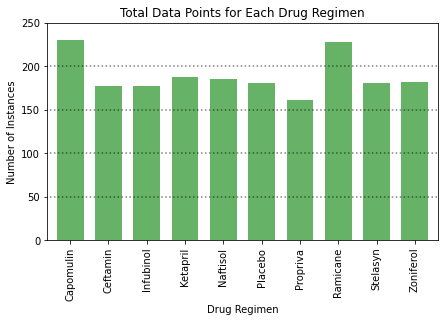

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = regimen_df["Mouse ID"].count()
count_df = pd.DataFrame({"Number of Instances": regimen_count})

regimen_plot = count_df.plot.bar(figsize=(7, 4), color='g', width=0.7, title="Total Data Points for Each Drug Regimen", 
                                 ylim=(0, max(regimen_count)+20), legend=False, alpha=0.6)
regimen_plot.set_ylabel("Number of Instances")

plt.hlines(range(50, 250, 50), xmin=-5, xmax=10, linestyle=':', alpha=0.5)

plt.savefig("Images/pandas_bar_plot.png")


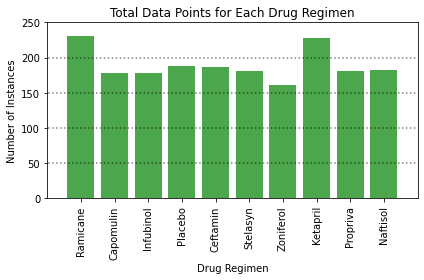

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(merged_df["Drug Regimen"].unique()))
y_axis = regimen_df["Mouse ID"].count()

tick_locations = [value for value in x_axis]


plt.bar(x_axis, y_axis, color='g', alpha=0.7, align="center")
plt.xticks(tick_locations, merged_df["Drug Regimen"].unique(), rotation="vertical")

plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis)+20)

plt.title("Total Data Points for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Instances")
plt.hlines(range(50, 250, 50), xmin=-5, xmax=10, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.savefig("Images/pyplot_bar_plot.png")

## Pie plots

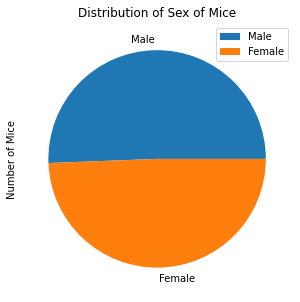

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = merged_df["Sex"].value_counts()
gender_df = pd.DataFrame({"Number of Mice": gender_count})

gender_plot = gender_df.plot.pie(y='Number of Mice', figsize=(5, 5), title="Distribution of Sex of Mice") 
                                 
gender_plot
plt.savefig("Images/pandas_pie_plot.png")

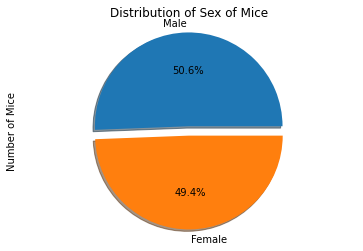

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_count.index
gen_count = gender_count.values
explode = (0.1, 0)

plt.pie(gen_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("Distribution of Sex of Mice")
plt.ylabel("Number of Mice")
plt.savefig("Images/pyplot_pie_plot.png")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_timepoint_df = merged_df.loc[merged_df.groupby("Mouse ID").Timepoint.idxmax()]
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


for drug in drug_list:
    drug_df = max_timepoint_df[max_timepoint_df["Drug Regimen"] == drug]

    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    
    min_tumor = drug_df["Tumor Volume (mm3)"].min()
    max_tumor = drug_df["Tumor Volume (mm3)"].max()
    
    print(f"The smallest tumor of {drug} is: {min_tumor}")
    print(f"The largest tumor of {drug} is: {max_tumor}")
    
    if min_tumor < lower_bound or max_tumor > upper_bound:
        print(f"***There is an outlier for {drug}.***")
    
    print("-------------------------------------------------------------\n")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers
The smallest tumor of Capomulin is: 23.34359787
The largest tumor of Capomulin is: 47.68596303
-------------------------------------------------------------

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers
The smallest tumor of Ramicane is: 22.05012627
The largest tumor of Ramicane is: 45.22086888
-------------------------------------------------------------

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be

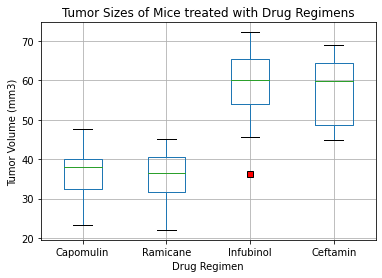

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interes
drug_dict = {}

for drug in drug_list:
    drug_df = max_timepoint_df[max_timepoint_df["Drug Regimen"] == drug]
    
    drug_dict[drug] = drug_df["Tumor Volume (mm3)"].values

box_plot_df = pd.DataFrame(drug_dict)
red_square = dict(markerfacecolor='r', marker='s')
box_plot = box_plot_df.boxplot(flierprops=red_square)
box_plot.set_title("Tumor Sizes of Mice treated with Drug Regimens")
box_plot.set_ylabel("Tumor Volume (mm3)")
box_plot.set_xlabel("Drug Regimen")
plt.savefig("Images/box_plot.png")

## Line and scatter plots

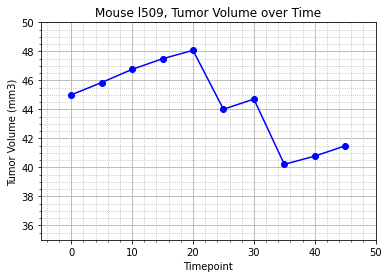

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_df = study_results.groupby("Mouse ID")
mouse_l509 = study_results[study_results["Mouse ID"] == "l509"]

x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker ='o', color='blue')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse l509, Tumor Volume over Time")
plt.ylim(35, 50)
plt.xlim(-5, 50)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("Images/line_plot.png")

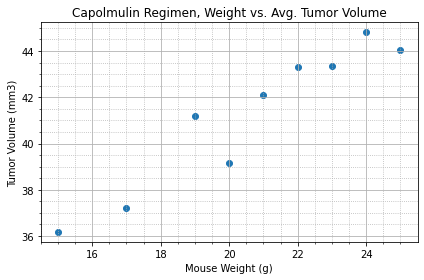

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]
mouse_weight = capomulin_df["Weight (g)"].unique()
avg_tumor_list = []

for weight in mouse_weight:
    weight_df = capomulin_df[capomulin_df["Weight (g)"] == weight]
    
    avg_tumor = weight_df["Tumor Volume (mm3)"].mean()
    avg_tumor_list.append(avg_tumor)
    
x_values = mouse_weight
y_values = avg_tumor_list

plt.scatter(x_values,y_values)
plt.title("Capolmulin Regimen, Weight vs. Avg. Tumor Volume")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
# plt.ylim(35, 50)
# plt.xlim(10, 30)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/scatter_plot.png")

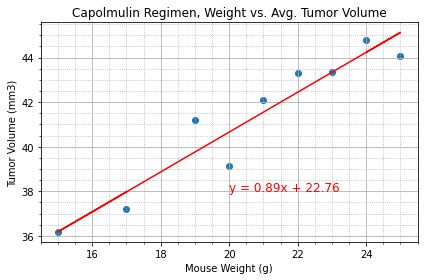

The r-squared is: 0.9034966277438611
The correlation between Weight and Average Tumor Volume for Capomulin is 0.95


<Figure size 432x288 with 0 Axes>

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("Capolmulin Regimen, Weight vs. Avg. Tumor Volume")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=12,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
# plt.ylim(35, 50)
# plt.xlim(10, 30)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation between Weight and Average Tumor Volume for Capomulin is {round(correlation[0],2)}")
plt.savefig("Images/scatter_plot_linear_regression.png")